<h1>Boston Housing Models<h1>

<h2> Importing necessary Libraries <h2>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("boston.xls")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [71]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [73]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No need to clean or further manipulation of the given dataset as it doesn't contain null values or invalid data types.

<h2> Data Visualisation </h2>

In [74]:
columns = df.columns
print(columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [75]:
import math
def dist_custom(dataset, columns_list, rows=None, cols=None, suptitle=''):

    n = len(columns_list)

    if rows is None or cols is None:
        cols = math.ceil(math.sqrt(n))
        rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(16, 16))
    fig.suptitle(suptitle, y=1.02, size=25)

    axs = axs.flatten()

    for i, col in enumerate(columns_list):
        sns.kdeplot(dataset[col], ax=axs[i], fill=True, alpha=.5, linewidth=0)
        axs[i].set_title(f"{col}, skew: {round(dataset[col].skew(), 2)}")

    for j in range(i+1, rows*cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

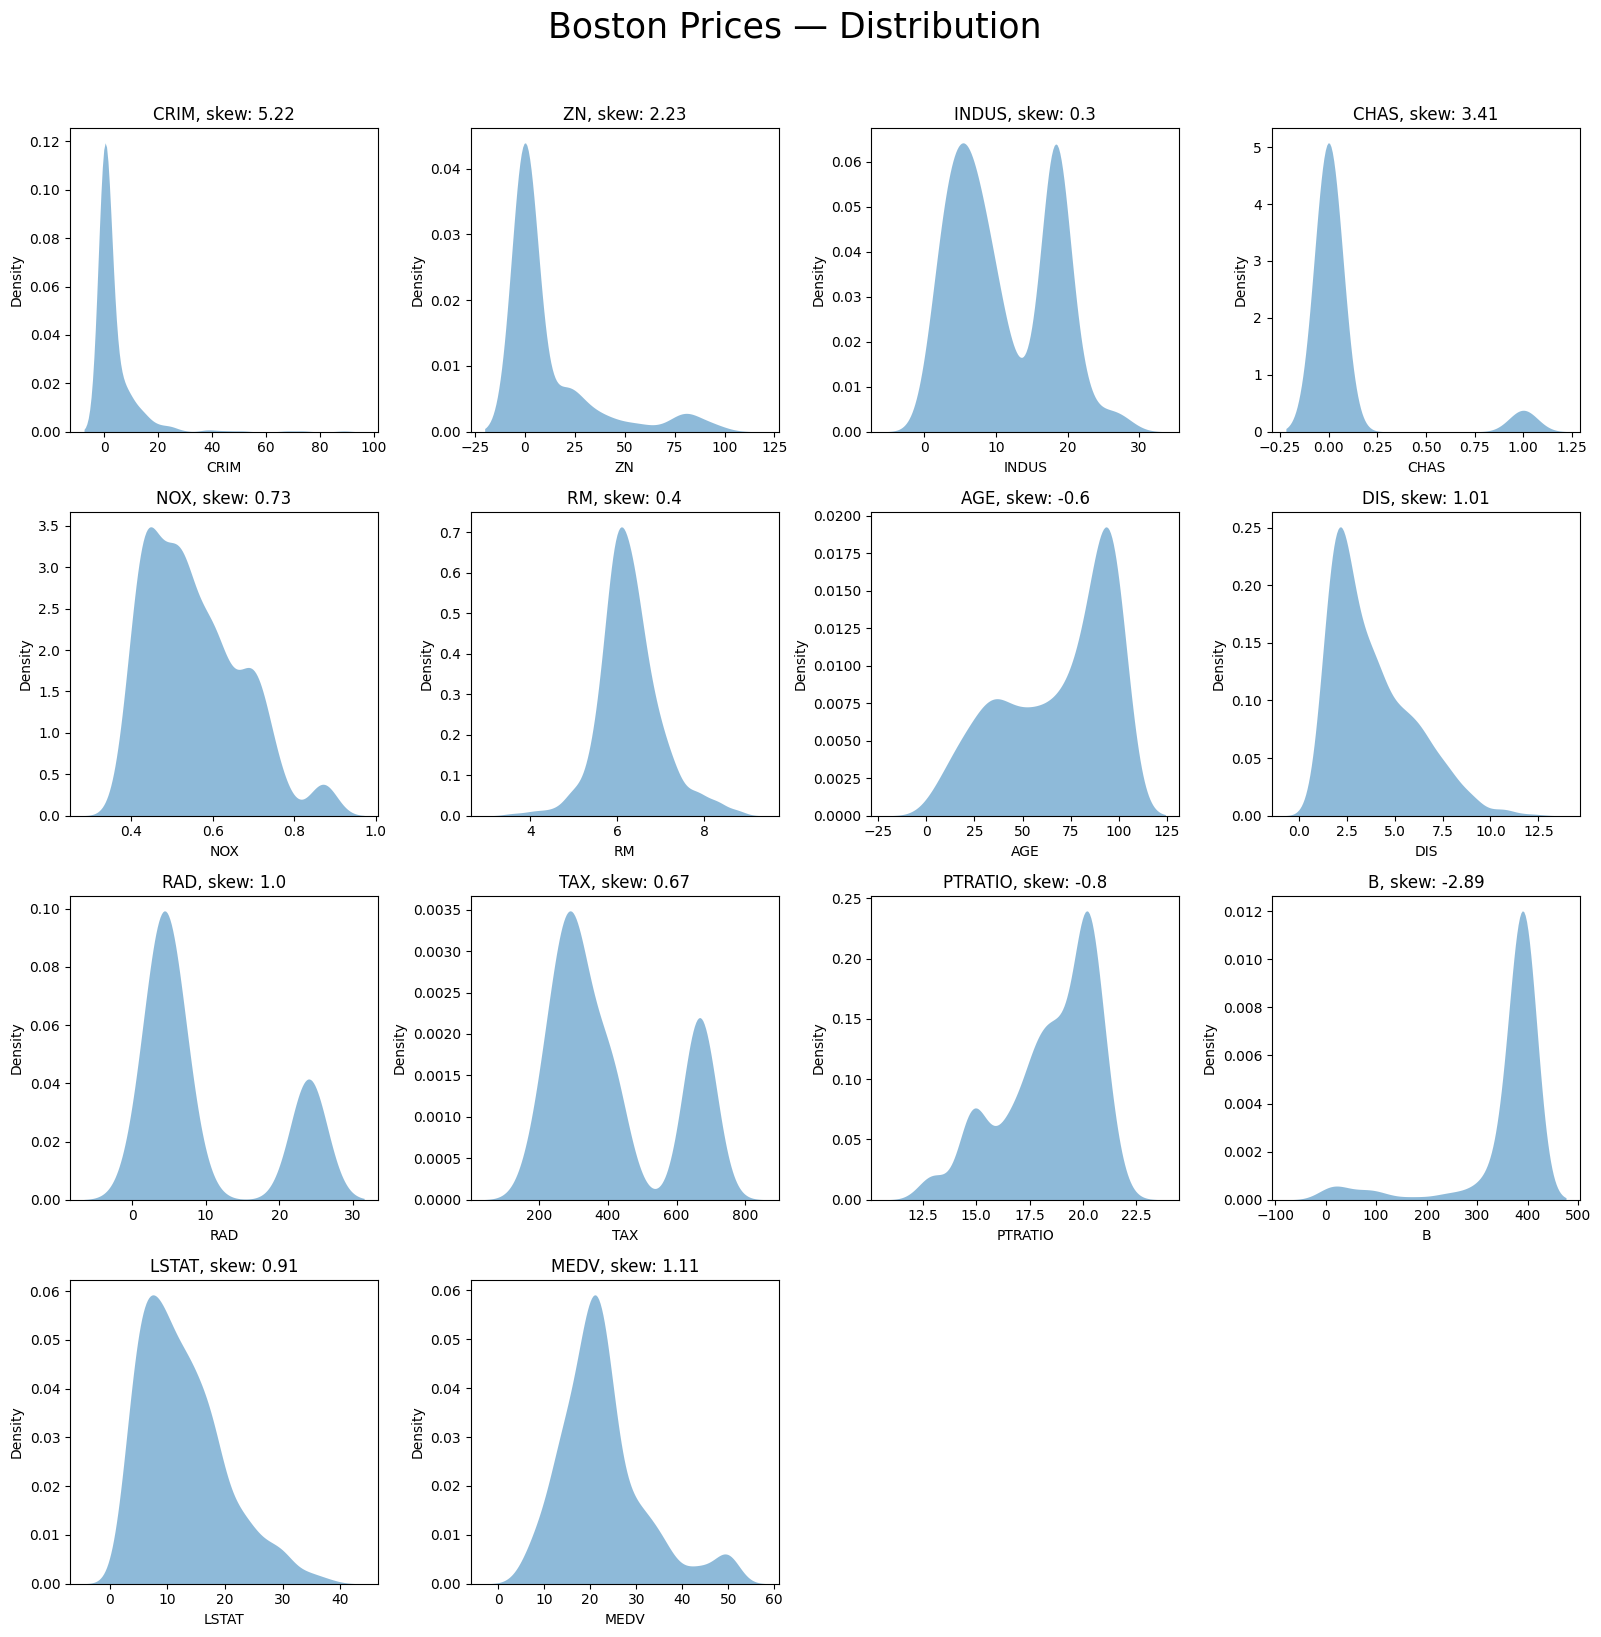

In [76]:
dist_custom(df, columns, suptitle="Boston Prices — Distribution")

> ---

<h2> Data Preprocessing <h2>

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [78]:
cat_cols = ['RAD', 'CHAS']
df[cat_cols] = df[cat_cols].astype('category')

In [79]:
# feature variables
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [80]:
X = pd.get_dummies(X, drop_first=True)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [82]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

Now that we have preprocessed our data, lets move on to implementation of ML models

> ---

<h2> Model Implementation and Tecniques </h2>

Lets start with Multiple Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ISLP.models import \
    (Stepwise,
     sklearn_selected,
     sklearn_selection_path)
from ISLP.models import ModelSpec as MS
from statsmodels.api import OLS
from functools import partial
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_predict
import statsmodels.api as sm
import sklearn.model_selection as skm
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso

In [85]:
y_pred_MLR = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_MLR)
r2 = r2_score(y_test, y_pred_MLR)
mae = mean_absolute_error(y_test, y_pred_MLR)

print(f"mse: {mse}")
print(f"R^2: {r2}")
print(f"mae: {mae}")

mse: 20.98702390043184
R^2: 0.7552979250354201
mae: 3.3885707115505257


In [86]:
results_MLR = pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : y_pred_MLR})
results_MLR.head()

,Actual Performance,Predicted Performance
321,23.1,24.169858
327,22.2,18.489955
476,16.7,20.982991
158,24.3,29.846656
145,13.8,11.581436


In [87]:
def scatter_plot(x_column, y_column, data, title="Actual vs Predicted", xlabel=None, ylabel=None):
    plt.figure(figsize=(8,6))

    plt.scatter(data[x_column], data[y_column], alpha=0.6)

    # Reference line for perfect predictions
    max_val = max(data[x_column].max(), data[y_column].max())
    min_val = min(data[x_column].min(), data[y_column].min())
    plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", linewidth=2)

    plt.title(title)
    plt.xlabel(xlabel if xlabel else x_column)
    plt.ylabel(ylabel if ylabel else y_column)
    plt.show()

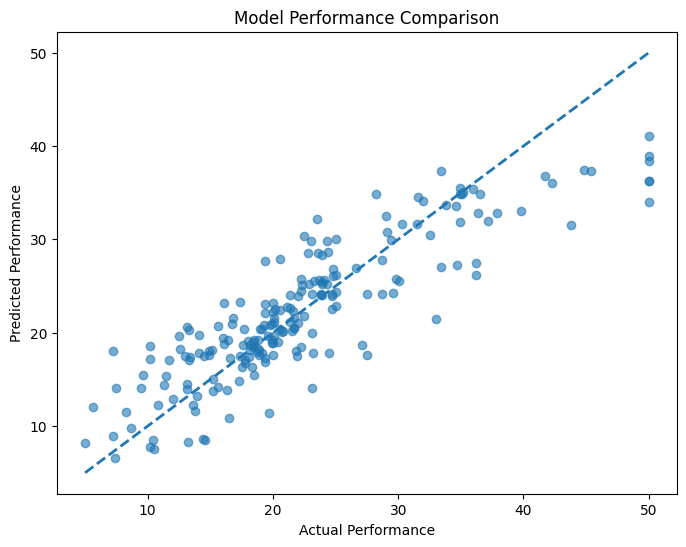

In [88]:
scatter_plot(
    x_column="Actual Performance",
    y_column="Predicted Performance",
    data=results_MLR,
    title="Model Performance Comparison"
)

Using K-Fold Cross Validation

In [117]:
K=5
kfold = KFold(K,
              random_state=0,
              shuffle=True)
Y_cv = cross_val_predict(lin_reg, X_train, y_train, cv =kfold)
Y_cv.shape

(303,)

In [118]:
mse = mean_squared_error(y_train, Y_cv)
rmse = mse**0.5
print("RMSE:", rmse)

RMSE: 5.197237369520734


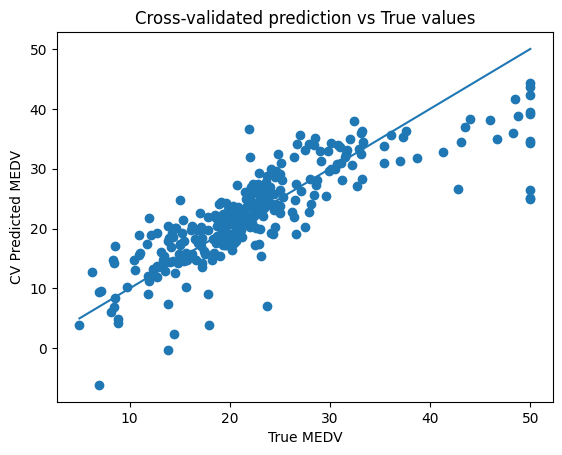

In [121]:
plt.scatter(y_train, Y_cv)
plt.plot([y_train.min(), y_train.max()],
         [y_train.min(), y_train.max()])
plt.xlabel("True MEDV")
plt.ylabel("CV Predicted MEDV")
plt.title("Cross-validated prediction vs True values")
plt.show()

<h3> Forward Selection </h3>

In [104]:
def neg_CP(sigma2, estimator, X, Y):
    """
    calculates negative CP statistic
    """
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y-Yhat)**2)
    return -(RSS + 2*p*sigma2) / n

In [105]:
design = MS(df.columns.drop('MEDV')).fit(df)
Y = np.array(df['MEDV'])
X = design.transform(df)
sigma2 = OLS(Y, X).fit().scale
strategy = Stepwise.first_peak(
    design,
    direction='forward',
    max_terms=len(design.terms)
)

In [106]:
neg_Cp = partial(neg_CP, sigma2)

In [92]:
df_selected = sklearn_selected(OLS, strategy)
df_selected.fit(df, Y)
df_selected.selected_state_

('AGE',
 'B',
 'CHAS',
 'CRIM',
 'DIS',
 'INDUS',
 'LSTAT',
 'NOX',
 'PTRATIO',
 'RAD',
 'RM',
 'TAX',
 'ZN')

These are the columns that are selected by forward selection method by default selection. However if we use negative CP score:

In [109]:
def cp_scorer(estimator, X, Y):
    return neg_CP(sigma2, estimator, X, Y)

In [123]:
boston_CP = sklearn_selected(
    OLS,
    strategy,
    scoring=cp_scorer
)

boston_CP.fit(df, Y)
print("Selected variables:", boston_CP.selected_state_)

Selected variables: ('B', 'CHAS', 'CRIM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN')


In [144]:
selected_terms = ['B', 'CHAS', 'CRIM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']
X_selected = design.transform(df, selected_terms)
X_selected_with_intercept = sm.add_constant(X_selected)

In [145]:
final_model = sm.OLS(Y, X_selected_with_intercept).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     72.70
Date:                Sat, 29 Nov 2025   Prob (F-statistic):          8.29e-132
Time:                        22:50:32   Log-Likelihood:                -1489.6
No. Observations:                 506   AIC:                             3021.
Df Residuals:                     485   BIC:                             3110.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.2596      5.434      6.489      0.0

In [147]:
Y_pred = final_model.predict(X_selected_with_intercept)
mse = mean_squared_error(Y, Y_pred)
print("MSE:", mse)

MSE: 21.1160963364149


<h3> Full path </h3>

In [153]:
strategy = Stepwise.fixed_steps(design,
                                len(design.terms),
                                direction='forward')
full_path = sklearn_selection_path(OLS, strategy)

In [ ]:
full_path.fit(df, Y)
Yhat_fixedsteps = full_path.predict(df)
Yhat_fixedsteps.shape

(506, 14)

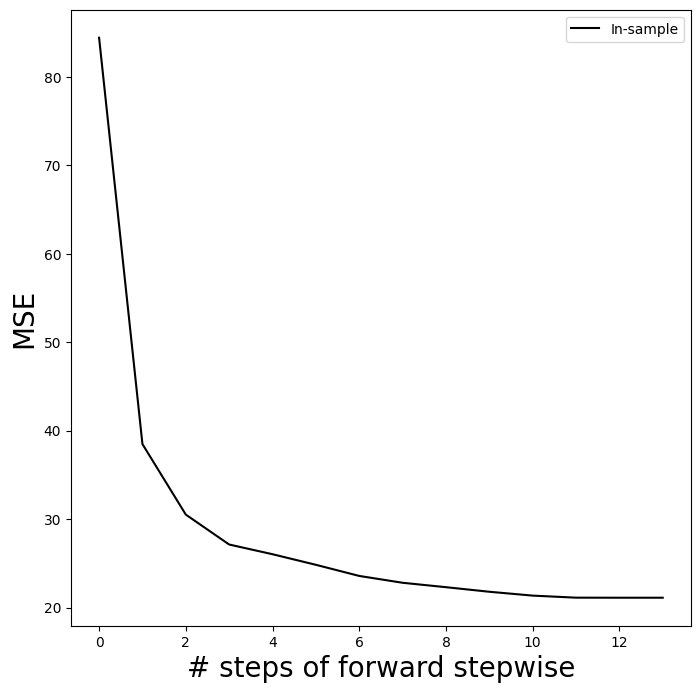

In [164]:
mse_fig, ax = plt.subplots(figsize=(8,8))
insample_mse = ((Yhat_fixedsteps - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
        insample_mse,
        'k', # color black
        label='In-sample')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
              fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()

Somewhere after 12 predictors is optimal.

<h3> Ridge Regression and Lasso Regression <h3>

In [195]:
alphas = np.logspace(-3, 3, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train, y_train)

,alphas,array([1.0000...00000000e+03])
,fit_intercept,True
,scoring,None
,cv,10
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [196]:
print("Best α:", ridge_cv.alpha_)

Best α: 15.199110829529332


In [197]:
y_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)

Ridge Regression MSE: 20.451387811927837


It's less than multiple regression model.

In [201]:
mse_scores_ridge = []

for a in alphas:
    ridge = Ridge(alpha=a)
    mse = -skm.cross_val_score(ridge, X_train, y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()
    mse_scores_ridge.append(mse)

best_alpha = alphas[np.argmin(mse_scores_ridge)]
print("Best α:", best_alpha)

Best α: 4.9770235643321135


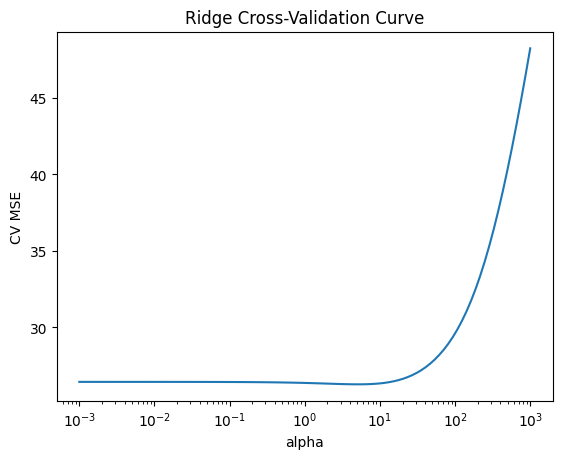

In [202]:
plt.plot(alphas, mse_scores_ridge)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV MSE")
plt.title("Ridge Cross-Validation Curve")
plt.show()

In [180]:
lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(X_train, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,array([1.0000...00000000e+03])
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,10
,verbose,False
,n_jobs,None


In [181]:
print("Best α:", lasso_cv.alpha_)

Best α: 0.016297508346206444


In [182]:
y_pred_lasso = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)

Lasso Regression MSE: 20.863813321661322


a little worse than ridge on this dataset.

In [199]:
mse_scores_lasso = []

for a in alphas:
    lasso = Lasso(alpha=a)
    mse = -skm.cross_val_score(lasso, X_train, y_train, cv=10,
                           scoring="neg_mean_squared_error").mean()
    mse_scores_lasso.append(mse)

best_alpha = alphas[np.argmin(mse_scores_lasso)]
print("Best α:", best_alpha)

Best α: 0.016297508346206444


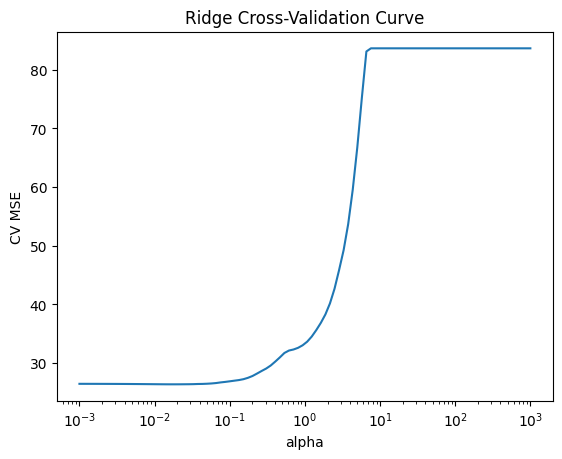

In [200]:
plt.plot(alphas, mse_scores_lasso)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV MSE")
plt.title("Ridge Cross-Validation Curve")
plt.show()

After a certain value of alpha, the MSE gradually jumps up in both the cases